Load the required libraries

In [1]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

2024-09-18 16:12:33.673408: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-18 16:12:33.673815: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:12:33.676078: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:12:33.683158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 16:12:33.693919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Load the CIFAR10 dataset


Training data: (50000, 32, 32, 3), (50000, 1)
Test data: (10000, 32, 32, 3), (10000, 1)


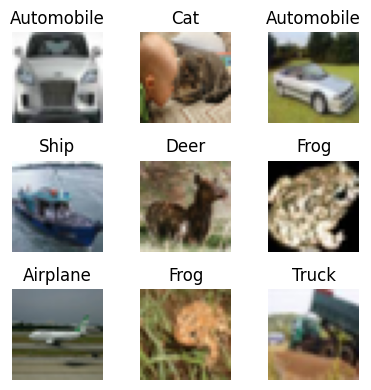

In [3]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

print(f"Training data: {xtrain.shape}, {ytrain.shape}\nTest data: {xtest.shape}, {ytest.shape}")

fig, ax = plt.subplots(3, 3, figsize=(4, 4))

np.random.seed(543210) 
image_ids = np.random.randint(0, xtrain.shape[0], size = 9).reshape(3, 3)

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(xtrain[image_ids[i,j]])
        ax[i, j].set_title(labels[ytrain[image_ids[i,j]][0]])
        ax[i, j].axis('off')

plt.tight_layout()

# Normalize the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# One-hot encode the labels
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

In [4]:
# Load VGG16
vgg16 = keras.applications.VGG16(include_top=False, 
                                 weights='imagenet', 
                                 input_shape=(32, 32, 3))

print(vgg16.summary())

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
# Freeze the layers up to block 3
for layer in vgg16.layers[:-8]:
    print(f"Freezing layer {layer.name}")
    layer.trainable = False

# Now we need to add our layers on top
# Create the model

model = keras.Sequential(vgg16.layers[:-4] + [keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

print(model.summary())

Freezing layer input_layer
Freezing layer block1_conv1
Freezing layer block1_conv2
Freezing layer block1_pool
Freezing layer block2_conv1
Freezing layer block2_conv2
Freezing layer block2_pool
Freezing layer block3_conv1
Freezing layer block3_conv2
Freezing layer block3_conv3
Freezing layer block3_pool


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,751,306 (33.38 MB)

 Trainable params: 7,015,818 (26.76 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

None


In [6]:
# Train the model
history = model.fit(xtrain, ytrain, 
                    epochs=15,
                    validation_split=0.1)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 286s 202ms/step - accuracy: 0.3569 - loss: 1.9847 - val_accuracy: 0.6444 - val_loss: 0.9895
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 344s 245ms/step - accuracy: 0.6622 - loss: 1.0167 - val_accuracy: 0.6932 - val_loss: 0.9050
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 248s 176ms/step - accuracy: 0.7050 - loss: 0.9013 - val_accuracy: 0.7230 - val_loss: 0.8295
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 245s 174ms/step - accuracy: 0.7272 - loss: 0.8361 - val_accuracy: 0.7170 - val_loss: 0.8584
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 236s 168ms/step - accuracy: 0.7439 - loss: 0.7953 - val_accuracy: 0.7530 - val_loss: 0.7495
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 242s 172ms/step - accuracy: 0.7572 - loss: 0.7485 - val_accuracy: 0.7394 - val_loss: 0.7881
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 245s 174ms/step - accuracy: 0.7597 - loss: 0.7299 - val_accuracy: 0.7558 - val_loss: 0.7843
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 240s 170ms/step - ac

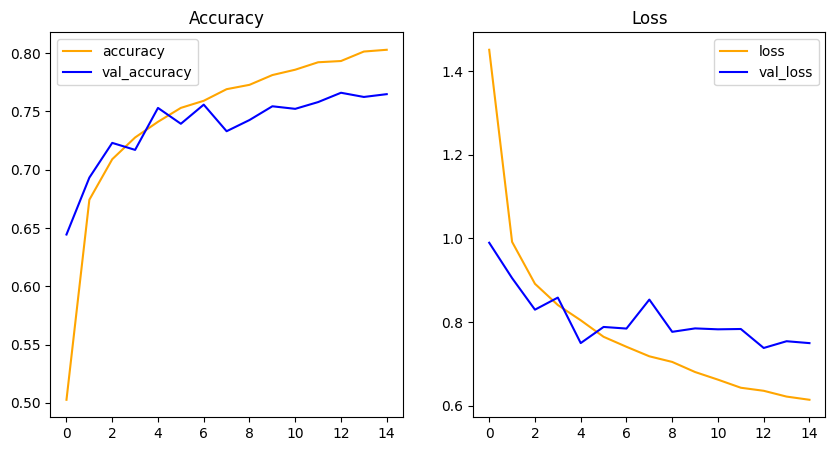

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history.history['accuracy'], label='accuracy', c="orange")
ax[0].plot(history.history['val_accuracy'], label='val_accuracy', c="blue")
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='loss', c="orange")
ax[1].plot(history.history['val_loss'], label='val_loss', c="blue")
ax[1].set_title('Loss')
ax[1].legend()
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

# Predict the test set
predictions = model.predict(xtest)

# Check the accuracy of the model
print(confusion_matrix(np.argmax(predictions, axis=1), np.argmax(ytest, axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step
[[832  26  79  28  30  14  16  17  76  45]
 [ 18 891   4  14   3   6   8   2  33  94]
 [ 30   2 698  51  62  44  56  30  12   9]
 [ 25  13  54 564  71 148  85  37  12  28]
 [  8   0  42  32 656  26  16  17   3   3]
 [  6   3  67 233  47 717  44  57   1   7]
 [  1   2  29  34  23   9 763   3   1   4]
 [ 13   2  20  28  95  32   3 827   6  13]
 [ 51   8   5   8  11   1   5   3 835  16]
 [ 16  53   2   8   2   3   4   7  21 781]]
